# welcome to the "Lead Score project" this project consist of increasing the percentage of convertion up to 80%. but in order to do that we need to know well the data to analyse it and work on it 


## let us first import the librairies needed as well as the data 

In [144]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
from sklearn.model_selection  import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import os

In [145]:
os.chdir("D:/downloads")

In [146]:
lead = pd.read_csv("leads.csv")

In [147]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [148]:
lead.shape

(9240, 37)

In [149]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [150]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [151]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## for time saving we can create a function to see the values count of all the columns

In [152]:
def overview():
    blank="..."*50
    for c in lead.columns:
        print(lead[c].value_counts().sort_values(ascending=False))
        print(blank)

In [153]:
overview()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
d9ed7525-5cf0-45ba-87c2-ca2bca521874    1
30422ea1-36fe-465e-9e68-41ee190fefb3    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
                                       ..
3f715465-2546-47cd-afa8-8b8dc63b8b43    1
c0b25922-511f-4c56-852e-ced210a45447    1
19d6451e-fcd6-407c-b83b-48e1af805ea9    1
82a7005b-7196-4d56-95ce-a79f937a158d    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
......................................................................................................................................................
660737    1
657379    1
660321    1
660624    1
660727    1
         ..
579622    1
579615    1
579564    1
579546    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
......................................................................................................................................................
Landing Page

### many columns has unique values counted at a percentage of minimum 99% , so will not be of use to our model . we need to drop them

In [154]:
lead.drop(columns=["I agree to pay the amount through cheque","Receive More Updates About Our Courses",
"Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Magazine","Search","What matters most to you in choosing a course",
"Update me on Supply Chain Content","Do Not Email","Do Not Call"], axis=1, inplace=True)

In [155]:
lead.shape

(9240, 24)

In [156]:
lead.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Lead Quality,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,...,Low in Relevance,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,...,NaN,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,...,Might be,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,...,Not Sure,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,...,Might be,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


### the feature representing origins, can be dropped too , as the origin either physical or virtual has few impact on an educational choice  

In [157]:
lead.drop(columns=["Get updates on DM Content","Prospect ID","Lead Number","Country","City","Lead Origin","Lead Source","Last Activity"], axis=1, inplace=True)

In [158]:
lead.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [159]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,0,0.0,0,0.0,Select,Select,Unemployed,Interested in other courses,Low in Relevance,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,0,5.0,674,2.5,Select,Select,Unemployed,Ringing,NaN,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,1,2.0,1532,2.0,Business Administration,Select,Student,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Select,02.Medium,01.High,13.0,17.0,No,Modified
4,1,2.0,1428,1.0,Select,Other,Unemployed,Will revert after reading the email,Might be,Select,02.Medium,01.High,15.0,18.0,No,Modified


In [160]:
lead.shape

(9240, 16)

In [161]:
lead["Specialization"].isnull().sum()

1438

### now time to have a look on the missing values

In [162]:
lead.isna().sum().sort_values(ascending=False)

Lead Quality                              4767
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
Tags                                      3353
Lead Profile                              2709
What is your current occupation           2690
How did you hear about X Education        2207
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### base on the numbers of missing values observed , we think that dropping columns with more than 35% of missing values won't damage the integrity of our final modeling 

In [163]:
limit=len(lead)*0.35
limit

3234.0

In [164]:
for c in lead.columns:
    if lead[c].isnull().sum()>=limit:
        lead.drop(columns=[c], axis=1, inplace=True)

In [165]:
lead.isnull().sum().sort_values(ascending=False)

Lead Profile                              2709
What is your current occupation           2690
How did you hear about X Education        2207
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### we estimate that from where we heard about an online course has few impact on the choice. so we can drop that column too

In [166]:
lead.drop(columns=["How did you hear about X Education"],axis=1,inplace=True)

In [167]:
lead.isnull().sum().sort_values(ascending=False)

Lead Profile                              2709
What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

one important step that will later be useful is to set apart categorical variables and numericals variables 

In [168]:
categorical=[]
for c in lead.columns:
    if lead[c].dtype=="object":
        categorical.append(c)

In [169]:
categorical

['Specialization',
 'What is your current occupation',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [170]:
numerical=[]
for c in lead.columns:
    if lead[c].dtype!="object":
        numerical.append(c)

In [171]:
numerical

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [172]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Converted                               9240 non-null   int64  
 1   TotalVisits                             9103 non-null   float64
 2   Total Time Spent on Website             9240 non-null   int64  
 3   Page Views Per Visit                    9103 non-null   float64
 4   Specialization                          7802 non-null   object 
 5   What is your current occupation         6550 non-null   object 
 6   Lead Profile                            6531 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [173]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,0.0,0,0.0,Select,Unemployed,Select,No,Modified
1,0,5.0,674,2.5,Select,Unemployed,Select,No,Email Opened
2,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,Yes,Email Opened
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Select,No,Modified
4,1,2.0,1428,1.0,Select,Unemployed,Select,No,Modified


since we are about to make a Logistic Regression modelling , the convinent data are the binaries one , so we can change the yes to 1 and the no to 0

In [174]:
lead.replace(to_replace=["Yes"], value=1, inplace=True)
lead.replace(to_replace=["No"], value=0,  inplace=True)

In [175]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,0.0,0,0.0,Select,Unemployed,Select,0,Modified
1,0,5.0,674,2.5,Select,Unemployed,Select,0,Email Opened
2,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,1,Email Opened
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Select,0,Modified
4,1,2.0,1428,1.0,Select,Unemployed,Select,0,Modified


In [176]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Converted                               9240 non-null   int64  
 1   TotalVisits                             9103 non-null   float64
 2   Total Time Spent on Website             9240 non-null   int64  
 3   Page Views Per Visit                    9103 non-null   float64
 4   Specialization                          7802 non-null   object 
 5   What is your current occupation         6550 non-null   object 
 6   Lead Profile                            6531 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   int64  
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 649.8+ KB


In [177]:
lead.isnull().sum().sort_values(ascending=False)

Lead Profile                              2709
What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

now let us deal with the remaining missing values we have again before being ready to move forward

In [178]:
for c in lead.columns:
      lead=lead[~pd.isnull(lead[c])]

In [179]:
lead.isnull().sum().sort_values(ascending=False)

Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### DONE !!

In [180]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
0,0,0.0,0,0.0,Select,Unemployed,Select,0,Modified
1,0,5.0,674,2.5,Select,Unemployed,Select,0,Email Opened
2,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,1,Email Opened
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Select,0,Modified
4,1,2.0,1428,1.0,Select,Unemployed,Select,0,Modified


#### times for creating dummies variables 

In [181]:
categorical

['Specialization',
 'What is your current occupation',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [182]:
dummy_1=pd.get_dummies(lead['Specialization']
 ,drop_first=True, prefix="special")
 
  

In [183]:
dummy2=pd.get_dummies(lead["What is your current occupation"],drop_first=True,prefix="occupation")

In [184]:
dummy3=pd.get_dummies(lead["Lead Profile"],drop_first=True, prefix="profile")

In [185]:
dummy4=pd.get_dummies(lead["A free copy of Mastering The Interview"],drop_first=True, prefix="copy")

In [186]:
dummy5=pd.get_dummies(lead["Last Notable Activity"],drop_first=True,prefix="last")

In [187]:
lead_final=pd.concat([lead,dummy_1,dummy2,dummy3,dummy4,dummy5],axis=1)

In [188]:
lead_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,special_Business Administration,...,last_Email Opened,last_Email Received,last_Had a Phone Conversation,last_Modified,last_Olark Chat Conversation,last_Page Visited on Website,last_SMS Sent,last_Unreachable,last_Unsubscribed,last_View in browser link Clicked
0,0,0.0,0,0.0,Select,Unemployed,Select,0,Modified,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,Select,Unemployed,Select,0,Email Opened,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,1,Email Opened,1,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Media and Advertising,Unemployed,Select,0,Modified,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Select,Unemployed,Select,0,Modified,0,...,0,0,0,1,0,0,0,0,0,0


In [189]:
dummy4

,copy_1
0,0
1,0
2,1
3,0
4,0
...,...
9234,0
9235,0
9236,1
9237,1


In [190]:
lead_final.drop(columns="copy_1",axis=1,inplace=True)

In [191]:
lead_final.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'special_Business Administration', 'special_E-Business',
       'special_E-COMMERCE', 'special_Finance Management',
       'special_Healthcare Management', 'special_Hospitality Management',
       'special_Human Resource Management', 'special_IT Projects Management',
       'special_International Business', 'special_Marketing Management',
       'special_Media and Advertising', 'special_Operations Management',
       'special_Retail Management', 'special_Rural and Agribusiness',
       'special_Select', 'special_Services Excellence',
       'special_Supply Chain Management', 'special_Travel and Tourism',
       'occupation_Housewife', 'occupation_Other', 'occupation_Student',
       'occupation_Unemployed', 'occupation_Working Professio

#### all the categorical variables from which we created dummies variable need not to be in the dataset anymore . so let us drop them 

In [192]:
categorical

['Specialization',
 'What is your current occupation',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [193]:
lead_final.drop(columns=["Specialization","What is your current occupation","Lead Profile","Last Notable Activity"],axis=1,inplace=True)

In [194]:
lead_final.shape

(6401, 46)

In [195]:
lead_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,special_Business Administration,special_E-Business,special_E-COMMERCE,special_Finance Management,special_Healthcare Management,...,last_Email Opened,last_Email Received,last_Had a Phone Conversation,last_Modified,last_Olark Chat Conversation,last_Page Visited on Website,last_SMS Sent,last_Unreachable,last_Unsubscribed,last_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


now we split our data 

In [196]:
y=lead.pop("Converted")
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 6401, dtype: int64

In [197]:
x=lead_final

In [198]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Converted                               6401 non-null   int64  
 1   TotalVisits                             6401 non-null   float64
 2   Total Time Spent on Website             6401 non-null   int64  
 3   Page Views Per Visit                    6401 non-null   float64
 4   A free copy of Mastering The Interview  6401 non-null   int64  
 5   special_Business Administration         6401 non-null   uint8  
 6   special_E-Business                      6401 non-null   uint8  
 7   special_E-COMMERCE                      6401 non-null   uint8  
 8   special_Finance Management              6401 non-null   uint8  
 9   special_Healthcare Management           6401 non-null   uint8  
 10  special_Hospitality Management          6401 non-null   uint

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

In [200]:
numerical.remove("Converted")

In [201]:
numerical

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

### a part from the categorical data we have the numerical datas , but one probleme is that the numerical data should be scaled accordingly. so that they will be in the range of 0 to 1 

In [202]:
scaler=MinMaxScaler()
x_train[numerical]=scaler.fit_transform(x_train[numerical])

knowing that we have too much columns, we will need to use the RFE tools to select for us the most relevent features for the model

In [ ]:
from sklearn.feature_selection import RFE
logreg=LogisticRegression()
rfe=RFE(logreg)


In [ ]:

rfe=rfe.fit(x_train,y_train)

In [ ]:
rfe.support_

array([ True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True, False, False])

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('special_Business Administration', False, 18),
 ('special_E-Business', False, 15),
 ('special_E-COMMERCE', False, 7),
 ('special_Finance Management', False, 20),
 ('special_Healthcare Management', True, 1),
 ('special_Hospitality Management', True, 1),
 ('special_Human Resource Management', False, 16),
 ('special_IT Projects Management', False, 21),
 ('special_International Business', False, 2),
 ('special_Marketing Management', False, 9),
 ('special_Media and Advertising', False, 17),
 ('special_Operations Management', False, 10),
 ('special_Retail Management', False, 12),
 ('special_Rural and Agribusiness', True, 1),
 ('special_Select', False, 8),
 ('special_Services Excellence', False, 6),
 ('special_Supply Chain Management', False, 11),
 ('special_Travel and Tourism', False, 3),
 ('occupation_Housewife', True, 1),
 ('occup

In [ ]:
col=x_train.columns[rfe.support_]

In [ ]:
x_train.columns[rfe.support_].shape

(22,)

the final retained features for modeling are as follows

In [ ]:
x_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'special_Healthcare Management', 'special_Hospitality Management',
       'special_Rural and Agribusiness', 'occupation_Housewife',
       'occupation_Other', 'occupation_Unemployed',
       'occupation_Working Professional', 'profile_Lateral Student',
       'profile_Other Leads', 'profile_Potential Lead', 'profile_Select',
       'profile_Student of SomeSchool', 'last_Email Bounced',
       'last_Had a Phone Conversation', 'last_Modified',
       'last_Olark Chat Conversation', 'last_SMS Sent', 'last_Unreachable'],
      dtype='object')

and these are those which have been rejected 

In [ ]:
x_train.columns[~rfe.support_]

Index(['special_Business Administration', 'special_E-Business',
       'special_E-COMMERCE', 'special_Finance Management',
       'special_Human Resource Management', 'special_IT Projects Management',
       'special_International Business', 'special_Marketing Management',
       'special_Media and Advertising', 'special_Operations Management',
       'special_Retail Management', 'special_Select',
       'special_Services Excellence', 'special_Supply Chain Management',
       'special_Travel and Tourism', 'occupation_Student',
       'last_Email Link Clicked', 'last_Email Marked Spam',
       'last_Email Opened', 'last_Email Received',
       'last_Page Visited on Website', 'last_Unsubscribed',
       'last_View in browser link Clicked'],
      dtype='object')

In [ ]:
x_train_sm=sm.add_constant(x_train[col])
reg2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1920
Model:                            GLM   Df Residuals:                     1897
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -891.64
Date:                Sun, 20 Nov 2022   Deviance:                       1783.3
Time:                        06:25:29   Pearson chi2:                 2.12e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3671
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     23.4382   2.59e+04      0.001      0.999   -5.07e+04    5.08e+04
TotalVisits                                1.6038      0.626      2.562      0.010       0.377       2.831
Total Time Spent on Website                3.4731      0.276     12.577      0.000       2.932       4.014
Page Views Per Visit                      -5.1545      0.627     -8.227      0.000      -6.383      -3.926
A free copy of Mastering The Interview    -0.5690      0.133     -4.262      0.000      -0.831      -0.307
special_Healthcare Management              0.8208      0.419      1.958      0.050      -0.001       1.642
special_Hospitality Management            -0.5111      0.511     -1.001      0.317      -1.512       0.490
special_Rural and Agribusiness             0.7897      0.540      1.463      0.143      -0.268       1.848
occupation_Housewife                      22.4401   3.76e+04      0.001      1.000   -7.37e+04    7.37e+04
occupation_Other                          -1.4058      1.167     -1.205      0.228      -3.693       0.881
occupation_Unemployed                     -1.2426      0.449     -2.768      0.006      -2.122      -0.363
occupation_Working Professional            1.8213      0.571      3.187      0.001       0.701       2.941
profile_Lateral Student                    1.4145   3.91e+04   3.62e-05      1.000   -7.66e+04    7.66e+04
profile_Other Leads                      -23.1939   2.59e+04     -0.001      0.999   -5.08e+04    5.07e+04
profile_Potential Lead                   -21.2860   2.59e+04     -0.001      0.999   -5.08e+04    5.07e+04
profile_Select                           -22.8427   2.59e+04     -0.001      0.999   -5.08e+04    5.07e+04
profile_Student of SomeSchool            -25.5380   2.59e+04     -0.001      0.999   -5.08e+04    5.07e+04
last_Email Bounced                        -0.6773      0.633     -1.071      0.284      -1.917       0.563
last_Had a Phone Conversation             22.1028    3.8e+04      0.001      1.000   -7.44e+04    7.44e+04
last_Modified                             -0.6750      0.150     -4.504      0.000      -0.969      -0.381
last_Olark Chat Conversation              -1.1973      0.774     -1.547      0.122      -2.714       0.319
last_SMS Sent                              1.1140      0.142      7.820      0.000       0.835       1.393
last_Unreachable                           1.4666      1.151      1.275      0.202      -0.789       3.722
==========================================================================================================
"""

as we can see , many features should be dropped again 

In [ ]:

rfe2=rfe.fit(x_train[col],y_train)

In [ ]:
list(zip(x_train[col].columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('special_Healthcare Management', False, 3),
 ('special_Hospitality Management', False, 12),
 ('special_Rural and Agribusiness', False, 6),
 ('occupation_Housewife', False, 8),
 ('occupation_Other', True, 1),
 ('occupation_Unemployed', True, 1),
 ('occupation_Working Professional', True, 1),
 ('profile_Lateral Student', True, 1),
 ('profile_Other Leads', False, 9),
 ('profile_Potential Lead', True, 1),
 ('profile_Select', False, 10),
 ('profile_Student of SomeSchool', True, 1),
 ('last_Email Bounced', False, 11),
 ('last_Had a Phone Conversation', False, 7),
 ('last_Modified', True, 1),
 ('last_Olark Chat Conversation', False, 2),
 ('last_SMS Sent', True, 1),
 ('last_Unreachable', True, 1)]

In [ ]:
x_train[col].columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'occupation_Other', 'occupation_Unemployed',
       'occupation_Working Professional', 'profile_Lateral Student',
       'profile_Potential Lead', 'profile_Student of SomeSchool',
       'last_Modified', 'last_SMS Sent', 'last_Unreachable'],
      dtype='object')

In [ ]:
x_train[col].columns[rfe.support_].shape

(11,)

In [ ]:
col2=x_train[col].columns[rfe.support_]

In [ ]:
x_train_sm=sm.add_constant(x_train[col2])
reg3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
reg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1920
Model:                            GLM   Df Residuals:                     1908
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -914.53
Date:                Sun, 20 Nov 2022   Deviance:                       1829.1
Time:                        06:39:04   Pearson chi2:                 2.14e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.7282      0.441      1.652      0.098      -0.136       1.592
Total Time Spent on Website         3.4188      0.270     12.671      0.000       2.890       3.948
Page Views Per Visit               -4.5843      0.503     -9.120      0.000      -5.569      -3.599
occupation_Other                   -1.7926      1.127     -1.590      0.112      -4.002       0.417
occupation_Unemployed              -1.4786      0.433     -3.413      0.001      -2.328      -0.630
occupation_Working Professional     1.5227      0.560      2.717      0.007       0.424       2.621
profile_Lateral Student            23.4870   1.77e+04      0.001      0.999   -3.46e+04    3.47e+04
profile_Potential Lead              1.6017      0.151     10.601      0.000       1.306       1.898
profile_Student of SomeSchool      -2.9499      0.669     -4.412      0.000      -4.260      -1.640
last_Modified                      -0.6601      0.145     -4.540      0.000      -0.945      -0.375
last_SMS Sent                       1.1361      0.137      8.301      0.000       0.868       1.404
last_Unreachable                    1.5419      1.165      1.323      0.186      -0.742       3.826
===================================================================================================
"""

the RFE can be done n-number of time until we get p-values as 0

let us then do again another reshaping with RFE

In [ ]:
rfe3=rfe.fit(x_train[col2],y_train)

In [ ]:
list(zip(x_train[col2].columns,rfe.support_,rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('occupation_Other', False, 5),
 ('occupation_Unemployed', False, 4),
 ('occupation_Working Professional', True, 1),
 ('profile_Lateral Student', False, 2),
 ('profile_Potential Lead', True, 1),
 ('profile_Student of SomeSchool', True, 1),
 ('last_Modified', False, 7),
 ('last_SMS Sent', False, 3),
 ('last_Unreachable', False, 6)]

In [ ]:
col3=x_train[col2].columns[rfe.support_]

In [ ]:
col3

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'occupation_Working Professional', 'profile_Potential Lead',
       'profile_Student of SomeSchool'],
      dtype='object')

In [ ]:
x_train_sm=sm.add_constant(x_train[col3])
reg4=sm.GLM(y_train,x_train_sm)
reg4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1920
Model:                            GLM   Df Residuals:                     1914
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.18131
Method:                          IRLS   Log-Likelihood:                -1082.1
Date:                Sun, 20 Nov 2022   Deviance:                       347.03
Time:                        07:19:49   Pearson chi2:                     347.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3175
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3724      0.018     20.885      0.000       0.337       0.407
Total Time Spent on Website         0.6483      0.042     15.563      0.000       0.567       0.730
Page Views Per Visit               -0.6841      0.076     -9.016      0.000      -0.833      -0.535
occupation_Working Professional     0.3470      0.033     10.519      0.000       0.282       0.412
profile_Potential Lead              0.2570      0.024     10.717      0.000       0.210       0.304
profile_Student of SomeSchool      -0.3431      0.053     -6.415      0.000      -0.448      -0.238
===================================================================================================
"""

looks satisfying, we can go for our prediction with these

In [ ]:
model=reg4.fit()
y_train_pred=model.predict(x_train_sm)

In [ ]:
y_train_pred.values.reshape(-1)

array([0.37236308, 0.37236308, 0.2957604 , ..., 0.24901451, 0.37236308,
       0.63733476])

In [ ]:
y_train_final=pd.DataFrame({"Converted":y_train.values,"Prob":y_train_pred.values})

In [ ]:
y_train_final.head()

,Converted,Prob
0,1,0.372363
1,0,0.372363
2,0,0.295760
3,1,0.976338
4,1,0.379762


let us round the probabilities values , those more than 0.5 to 1 and those less than 0.5 to 0 . we will get the following table

In [ ]:
y_train_final["Predicted"]=y_train_final["Prob"].map(lambda x: 1 if x>=0.5 else 0)

In [ ]:
y_train_final.head()

,Converted,Prob,Predicted
0,1,0.372363,0
1,0,0.372363,0
2,0,0.295760,0
3,1,0.976338,1
4,1,0.379762,0


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import confusion_matrix


confusion=metrics.confusion_matrix(y_train_final["Converted"],y_train_final["Predicted"])

In [ ]:
confusion

array([[772, 189],
       [315, 644]], dtype=int64)

In [ ]:
print(metrics.accuracy_score(y_train_final["Converted"],y_train_final["Predicted"]))

0.7375


In [ ]:
tp=confusion[1][1]
tn=confusion[0][0]
fp=confusion[0][1]
fn=confusion[1][0]

TPR=tp/(tp+fn)
TNR=tn/(tn+fp)
print(f"the sensitivity is :{TPR}, \n the specificity is:{TNR}")

the sensitivity is :0.6715328467153284, 
 the specificity is:0.8033298647242456


ROC is needed to evaluate the behaviour of our model in terme of efficiency 

In [ ]:
from sklearn.metrics import roc_auc_score

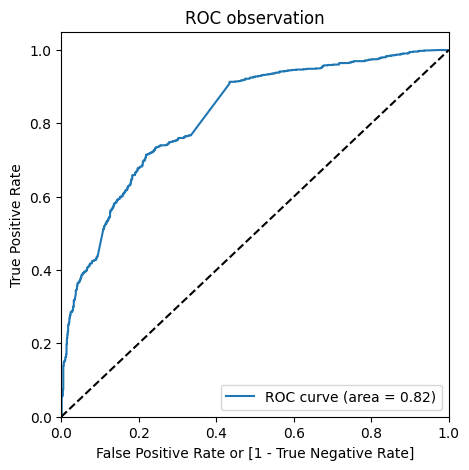

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC observation')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(y_train_final["Converted"], y_train_final["Prob"])

the area under the curve is 0.82 which is satisfying 

## thank you for you attention 